In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates=['Quarter'],
    date_parser=lambda x: datetime.strptime(x, '%m/%d/%Y'), keep_date_col=True)

df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [18]:
print("Rows: ", df.shape[0], "Columns: ", df.shape[1])
print(40*'^')
print("Features: ", df.columns.to_list())
print(40*'^')
print("Missing values:\n", df.isnull().any())
print(40*'^')
print("Unique values:\n", df.nunique())

Rows:  61 Columns:  3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Features:  ['Quarter', 'Revenue', 'Net Income']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Missing values:
 Quarter       False
Revenue       False
Net Income    False
dtype: bool
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Unique values:
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [20]:
import plotly.express as px

fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue')

fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(buttons=list([
    dict(count=1, label='1Y', step='year', stepmode='backward'),
    dict(count=2, label='2Y', step='year', stepmode='backward'),
    dict(count=3, label='3Y', step='year', stepmode='backward'),
    dict(step='all')])))
fig.show()

In [21]:
dt = df.set_index('Quarter')
dt.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


<AxesSubplot: xlabel='Quarter'>

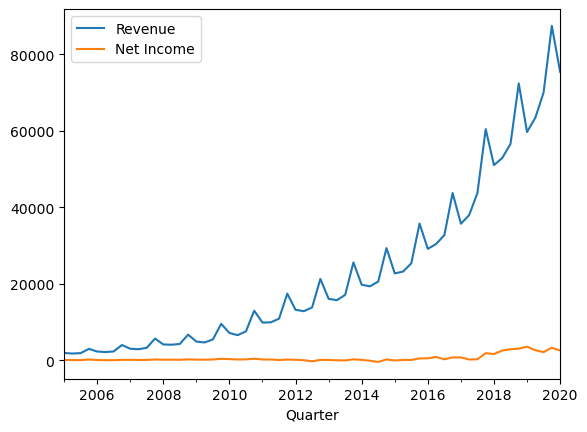

In [22]:
dt.plot()

In [23]:
from statsmodels.tsa.stattools import kpss

In [26]:
tstest = kpss(dt['Revenue'], 'ct')
tstest

c:\Users\equipo\miniconda3\envs\development\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.30665545975169556,
 0.01,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

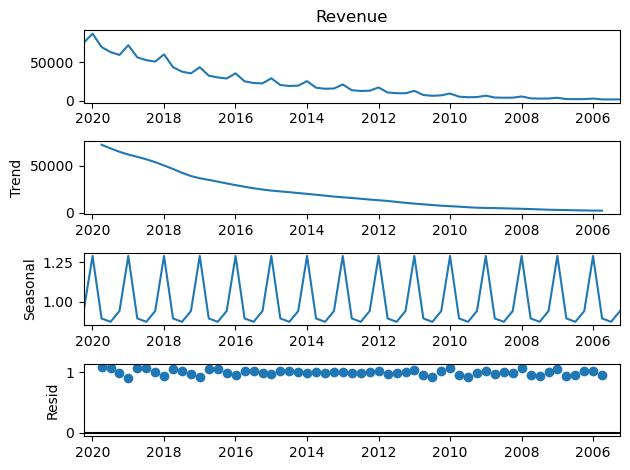

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(dt['Revenue'], model='multiplicative')

resplot = res.plot()

In [34]:
res.

<AxesSubplot: xlabel='Quarter'>

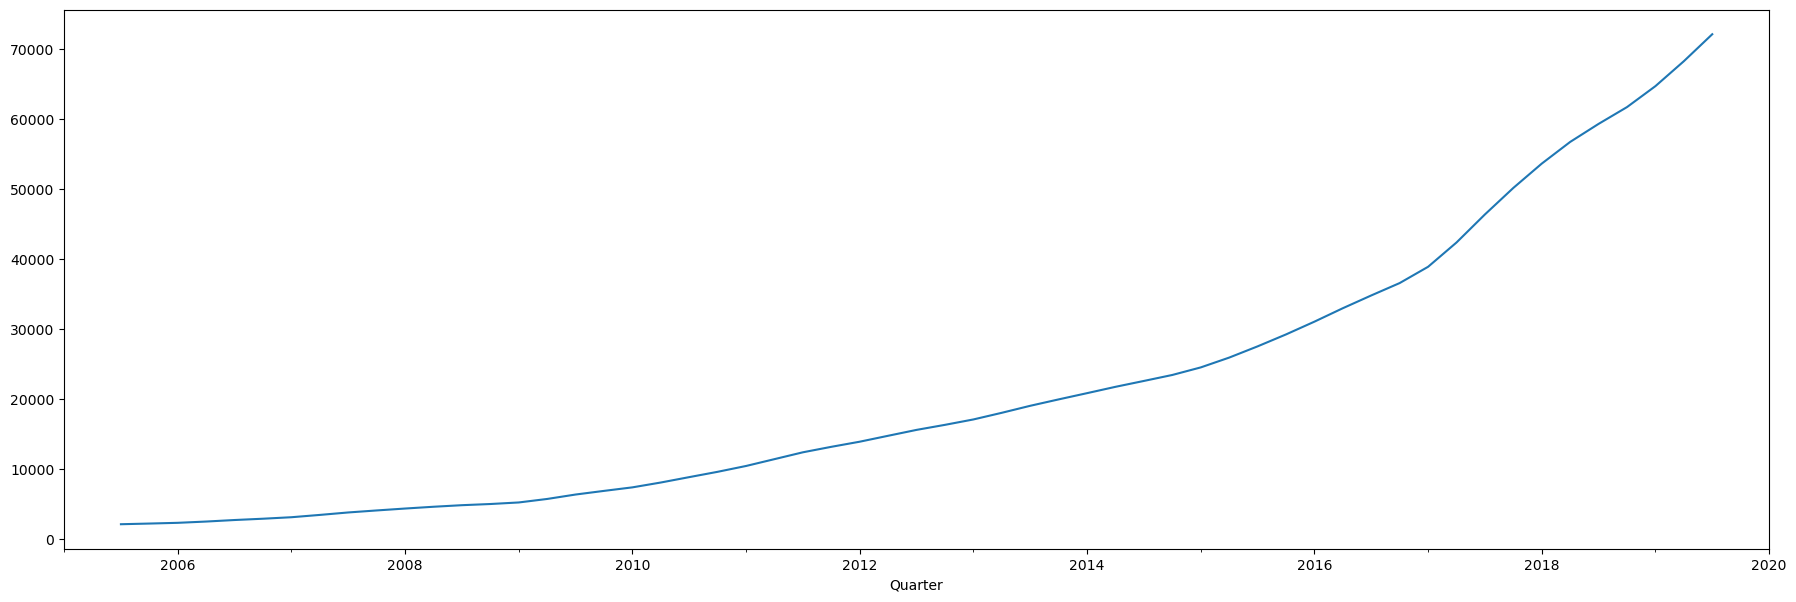

In [33]:
plt.figure(figsize=(22,7))
res.trend.plot()

<AxesSubplot: xlabel='Quarter'>

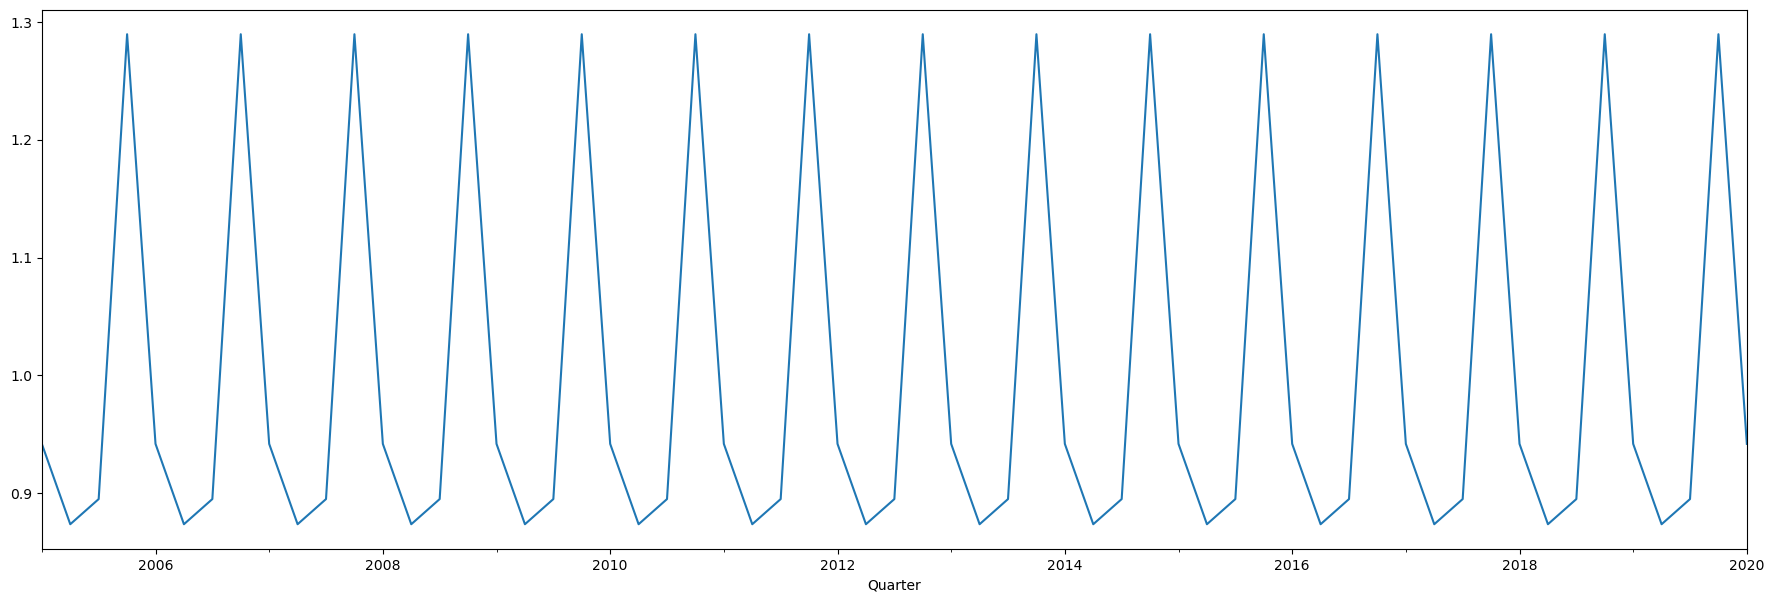

In [36]:
plt.figure(figsize=(22,7))
res.seasonal.plot()

<AxesSubplot: xlabel='Quarter'>

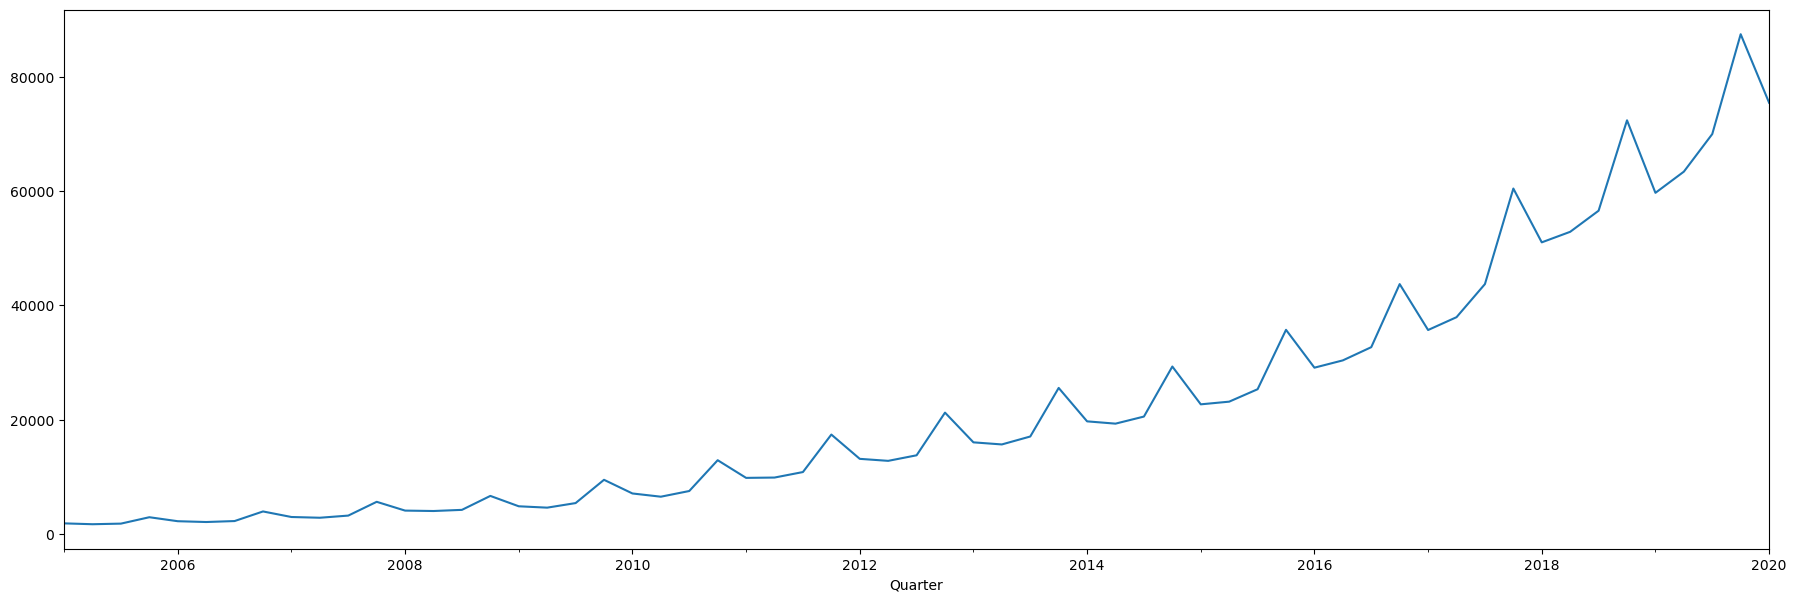

In [37]:
plt.figure(figsize=(22,7))
res.observed.plot()

<AxesSubplot: xlabel='Quarter'>

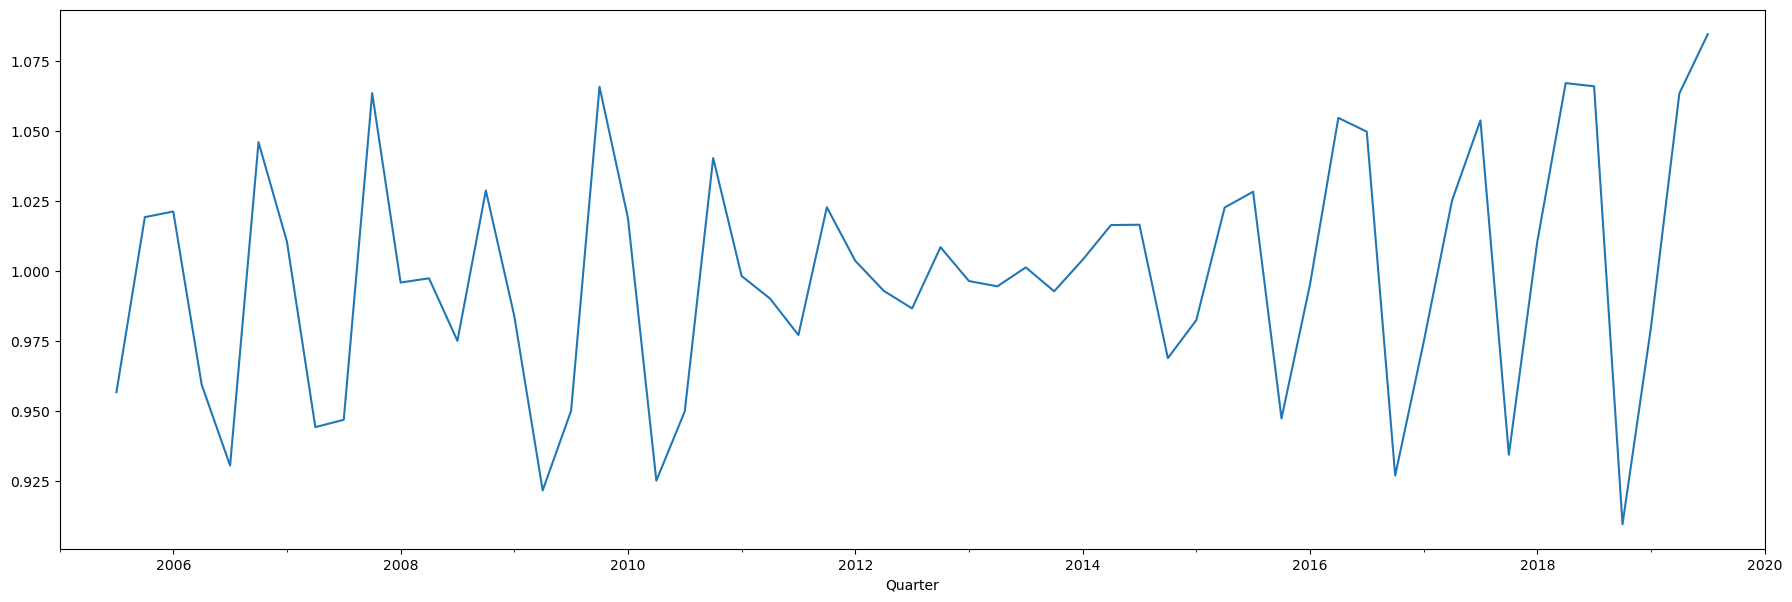

In [38]:
plt.figure(figsize=(22,7))
res.resid.plot()

In [42]:
print('Data :', dt.iloc[2]['Revenue'])
print('Observed :', res.observed[2])
print('Trend :', res.trend[2])
print('Seasonal :', res.seasonal[2])
print('Resid :', res.resid[2])
print(40*'^')
print(res.trend[2], 'x', res.seasonal[2], 'x',res.resid[2], '=', res.trend[2]*res.seasonal[2]*res.resid[2])

Data : 69981
Observed : 69981.0
Trend : 72099.5
Seasonal : 0.8949934630432637
Resid : 1.0844961831001492
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
72099.5 x 0.8949934630432637 x 1.0844961831001492 = 69980.99999999999


<AxesSubplot: xlabel='Quarter'>

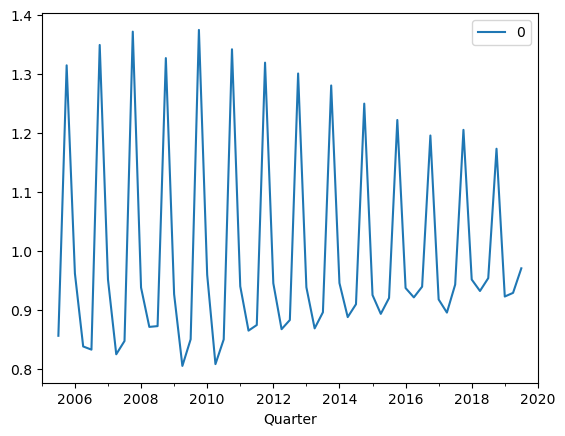

In [43]:
pd.DataFrame(res.observed/res.trend).plot()